In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
regisrations = pd.read_excel("/content/drive/My Drive/task.xlsx", sheet_name="Registrations")
sources = pd.read_excel("/content/drive/My Drive/task.xlsx", sheet_name="Sources")
costs = pd.read_excel("/content/drive/My Drive/task.xlsx", sheet_name="Costs")
activity = pd.read_excel("/content/drive/My Drive/task.xlsx", sheet_name="Activity")
payment_revenue = pd.read_excel("/content/drive/My Drive/task.xlsx", sheet_name="Payment Revenue")
ads_revenue = pd.read_excel("/content/drive/My Drive/task.xlsx", sheet_name="Ads revenue")
dfs = [regisrations, sources, costs, activity, payment_revenue, ads_revenue]

In [4]:
for df in dfs:
    df = df.convert_dtypes()
    print(list(df.columns))

['source_id', 'registration_date', 'user_id']
['source_id', 'network_name']
['date', 'source_id', 'cost']
['date', 'user_id', 'logins', 'likes', 'page_views', 'photo_uploads', 'messages']
['date', 'user_id', 'payment_revenue']
['date', 'user_id', 'ads_revenue']


In [5]:
regisrations["day_of_week"] = regisrations.registration_date.apply(lambda x: x.day_of_week)

<ipython-input-6-1f836b8791a5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  act_agg = activity.groupby("user_id").sum()


total 23199 users


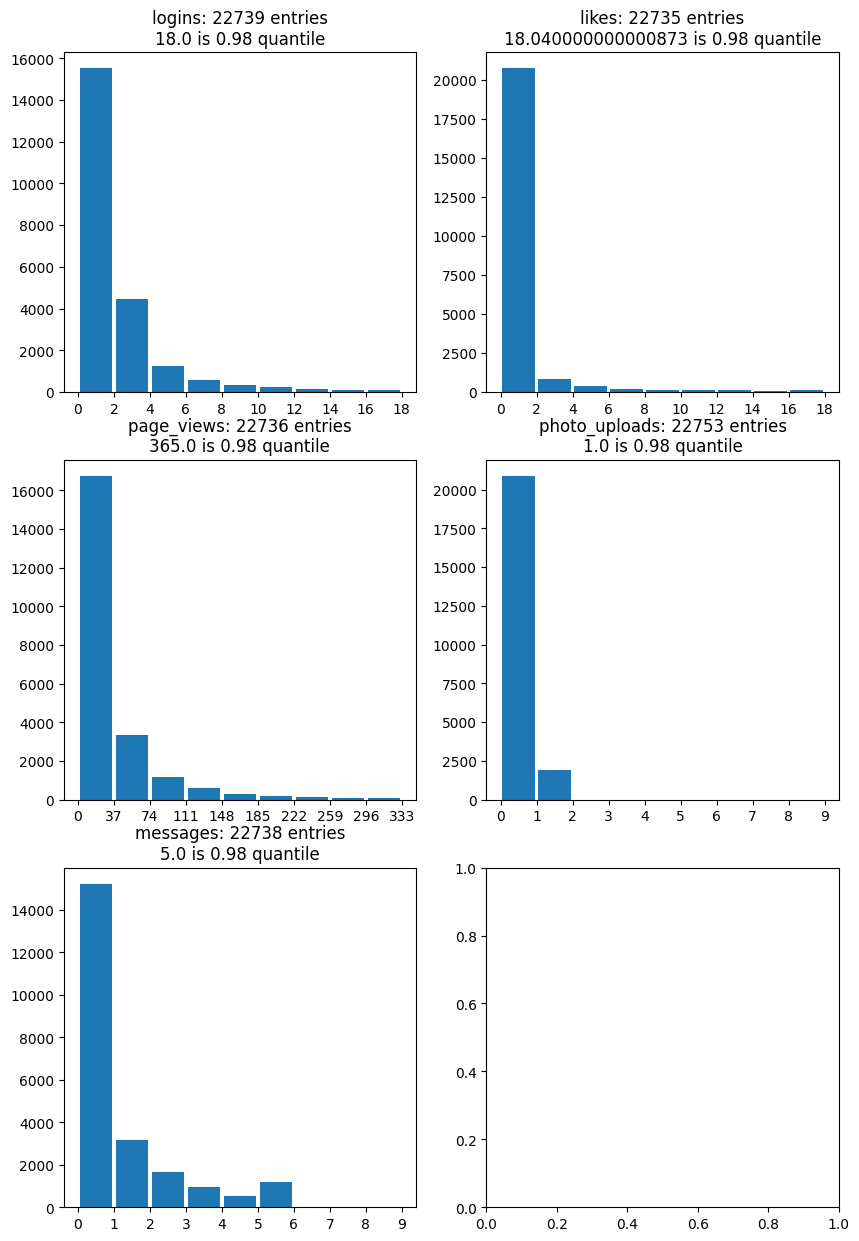

In [6]:
#activity distribution
act_agg = activity.groupby("user_id").sum()
fig, ax = plt.subplots(len(act_agg.columns) // 2 + 1, 2, figsize=(10, 15))
print(f"total {len(act_agg)} users")
for i, column in enumerate(act_agg.columns):
    q = act_agg[column].quantile(0.98)
    data = act_agg[column][act_agg[column] <= q]
    bins = np.arange(0, (data.max() // 10 + 1) * 10, data.max()//10 + 1)
    ax[i // 2, i % 2].hist(data, bins = bins, align="mid", rwidth=0.9)#, density=True)
    ax[i // 2, i % 2].set_xticks(bins)
    ax[i // 2, i % 2].set_title(column + f": {len(data)} entries\n{q} is 0.98 quantile")

In [7]:
print(len(act_agg.photo_uploads[act_agg.photo_uploads == 0])/ len(act_agg.photo_uploads))
print(len(act_agg.photo_uploads[act_agg.photo_uploads == 1])/ len(act_agg.photo_uploads))
print(len(act_agg.photo_uploads[act_agg.photo_uploads > 1])/ len(act_agg.photo_uploads))

0.899435320487952
0.08133971291866028
0.019224966593387648


In [8]:
act_agg.describe()

,logins,likes,page_views,photo_uploads,messages
count,23199.000000,23199.000000,23199.000000,23199.000000,23199.000000
mean,3.252209,1.825294,49.410104,0.159102,4.297039
std,18.853572,13.703867,191.144766,0.827833,56.575277
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,3.000000,0.000000,0.000000
50%,1.000000,0.000000,13.000000,0.000000,0.000000
75%,2.000000,0.000000,41.000000,0.000000,1.000000
max,1188.000000,760.000000,10202.000000,55.000000,4110.000000


748.3870967741935


Text(0.5, 1.0, 'Users registered')

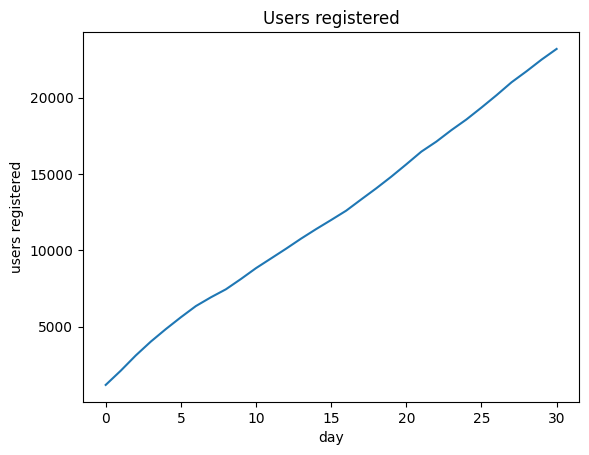

In [9]:
#total users
reg_agg = regisrations[["registration_date", "user_id"]].groupby("registration_date").count()
reg_agg = reg_agg.rename(columns={"user_id":"registered"})
reg_agg["total"] = reg_agg.registered.cumsum()
fig, ax1 = plt.subplots()
print(reg_agg.total[-1] / 31)
ax1.plot(range(len(reg_agg)), reg_agg.total)
ax1.set_xlabel("day")
ax1.set_ylabel("users registered")
ax1.set_title("Users registered")

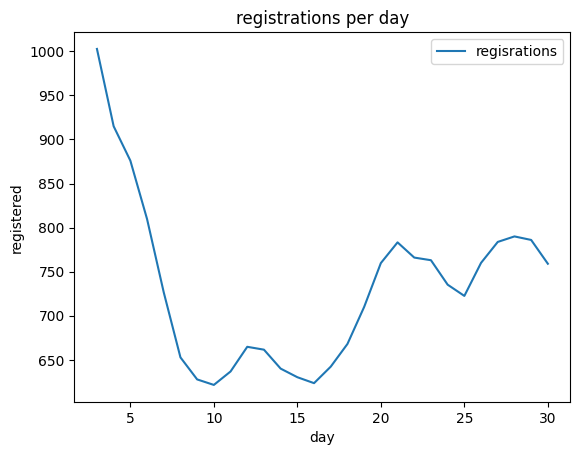

In [10]:
#new registrations
plt.plot(range(len(reg_agg.registered.rolling(4).mean())), reg_agg.registered.rolling(4).mean(), label="regisrations")
plt.xlabel("day")
plt.ylabel("registered")
plt.title("registrations per day")
plt.legend()

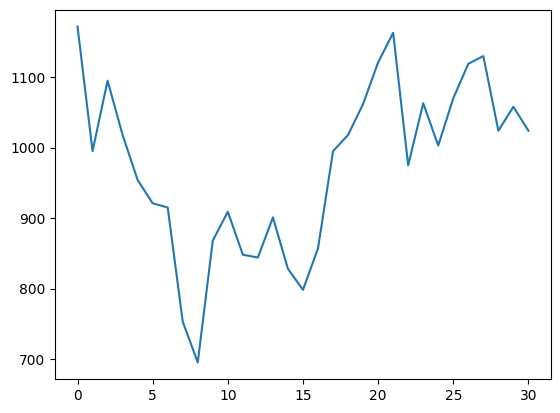

In [11]:
act_users = activity.groupby("date").count()
plt.plot(range(len(act_users)), act_users.user_id)

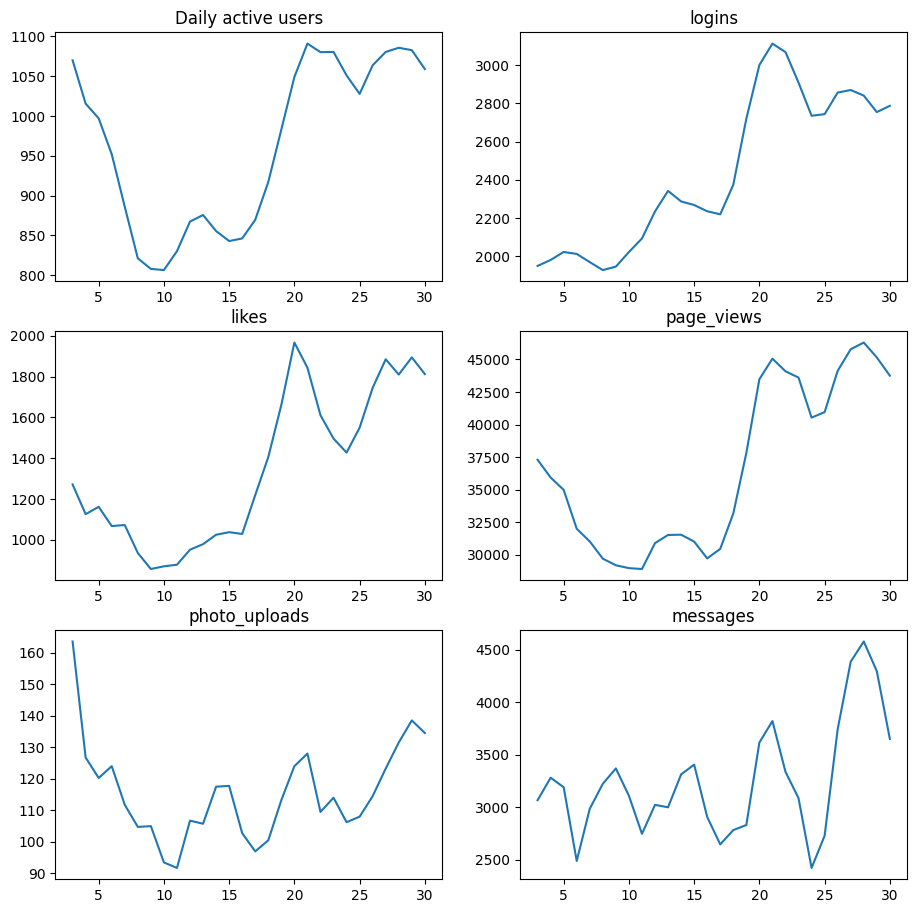

In [12]:
#activity dynamic
act_date = activity.groupby("date").sum().rolling(4).mean()
fig, ax = plt.subplots((len(act_date.columns) - 1) // 2 + 1, 2, figsize = (11, 11))
act_users = activity.groupby("date").count().rolling(4).mean()
ax[0, 0].plot(range(len(act_users)), act_users.user_id)
ax[0, 0].set_title("Daily active users")
#ax[0, 0].set_xlabel("day")
for i, column in enumerate(act_date.columns[1:]):
    ax[(i + 1) // 2, (i + 1) % 2].plot(range(len(reg_agg)), act_date[column], label=column)
    ax[(i + 1) // 2, (i + 1) % 2].set_title(column)
    #ax[(i + 1) // 2, (i + 1) % 2].set_xlabel("day")

In [13]:
act_date.columns

Index(['user_id', 'logins', 'likes', 'page_views', 'photo_uploads',
       'messages'],
      dtype='object')

likes 0.6500762263474128
page_views 15.695184288404628
photo_uploads 0.04824679400950587
messages 1.3097480046632588


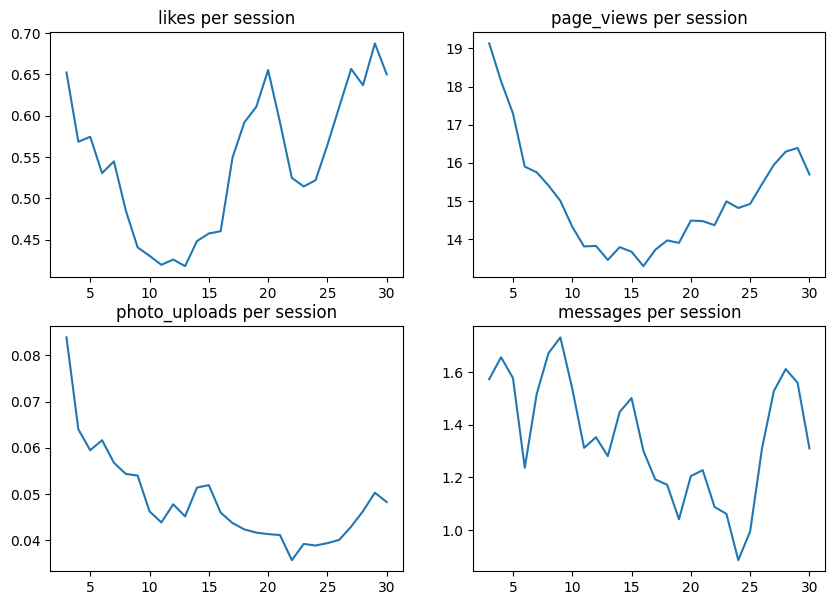

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(10, 7))
for i, col in enumerate(["likes", "page_views", "photo_uploads", "messages"]):
    ax[i // 2, i % 2].plot(range(31), act_date[col].div(act_date.logins))
    print(col, act_date[col].div(act_date.logins)[-1])
    ax[i // 2, i % 2].set_title(col + " per session")

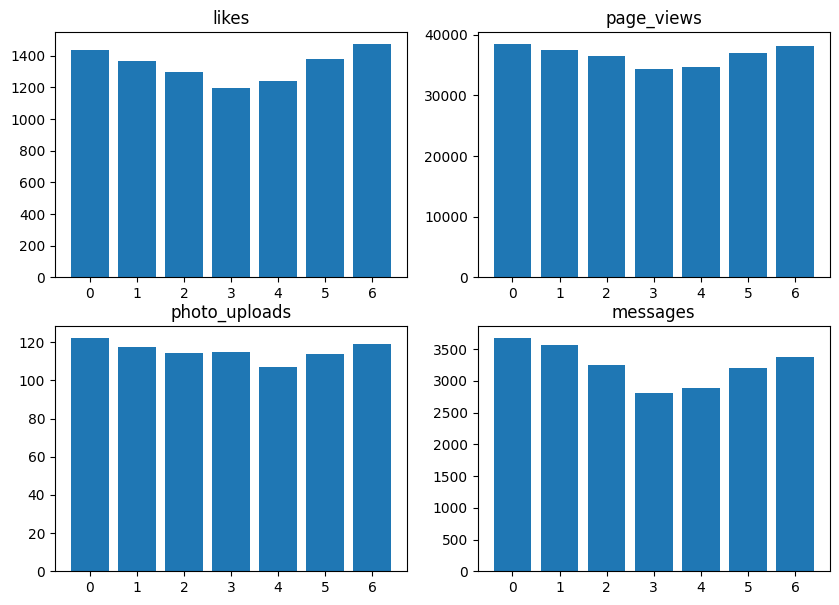

In [15]:
#difference during the week
act_date["day_of_week"] = act_date.index.day_of_week
act_week = act_date[act_date.columns[2:]].groupby("day_of_week").mean()
fig, ax = plt.subplots(2, 2, figsize = (10, 7))
for i, column in enumerate(act_week.columns):
    ax[i // 2, i % 2].bar(act_week.index, act_week[column])
    ax[i // 2, i % 2].set_title(column)

In [16]:

#difference during the week
act_week.messages.max() / act_week.messages.min()

1.3073040578098944

1061


Text(0.5, 1.0, 'Daily active users')

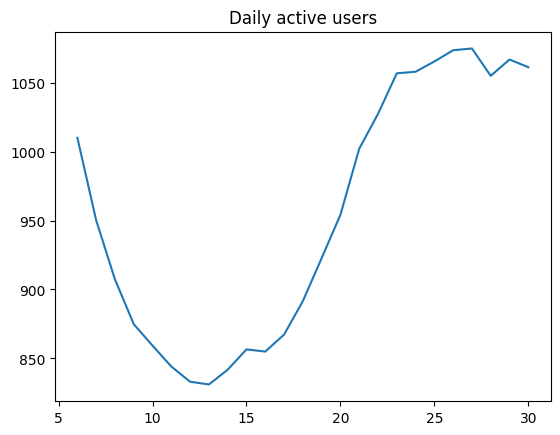

In [17]:
#daily active users
dau_df = activity[["date", "user_id"]].groupby("date").count()
print(round(dau_df.user_id.rolling(7).mean()[-1]))
plt.plot(range(len(dau_df)), dau_df.user_id.rolling(7).mean())
plt.title("Daily active users")

In [18]:
#sessions per user
spu = act_agg["logins"].to_frame()
spu = spu.merge(regisrations[["registration_date", "user_id", "source_id"]], how="inner", left_index=True, right_on="user_id").set_index("user_id")
spu["days"] = regisrations.registration_date.max() - spu.registration_date + pd.Timedelta("1 day")
spu["spu"] = spu.logins / spu.days.apply(lambda x: x.days)
spu = spu.groupby("source_id").spu.mean().to_frame()
spu.index = sources.network_name
spu = spu.reset_index()
spu

,network_name,spu
0,Tik-Тok,0.357097
1,SEO,0.274455
2,Facebook,0.354651
3,Search Ads,0.227471
4,Adwords,0.089846
5,Snapchat,0.293345


In [19]:
#quality of users
actions = activity.merge(regisrations[["user_id", "source_id"]], how="inner", on="user_id")
actions = actions.drop(columns=["date", "user_id"])
user_count = actions.groupby("source_id").count().iloc[:, 0]
actions = actions.groupby("source_id").sum()
actions["users"] = user_count
user_count.index = sources.network_name
actions = actions.div(actions.users.values, axis=0)
actions.index = sources.network_name
actions.reset_index(inplace=True)
actions

,network_name,logins,likes,page_views,photo_uploads,messages,users
0,Tik-Тok,2.255814,2.091799,29.159119,0.094247,1.895961,1.0
1,SEO,2.872379,1.041933,24.381951,0.046490,1.225160,1.0
2,Facebook,2.586270,1.306475,39.691597,0.125729,3.590978,1.0
3,Search Ads,1.577579,1.804224,39.057677,0.164094,3.289196,1.0
4,Adwords,1.516842,1.100000,32.226316,0.076842,2.788421,1.0
5,Snapchat,2.531522,1.804494,36.208920,0.136486,2.837357,1.0


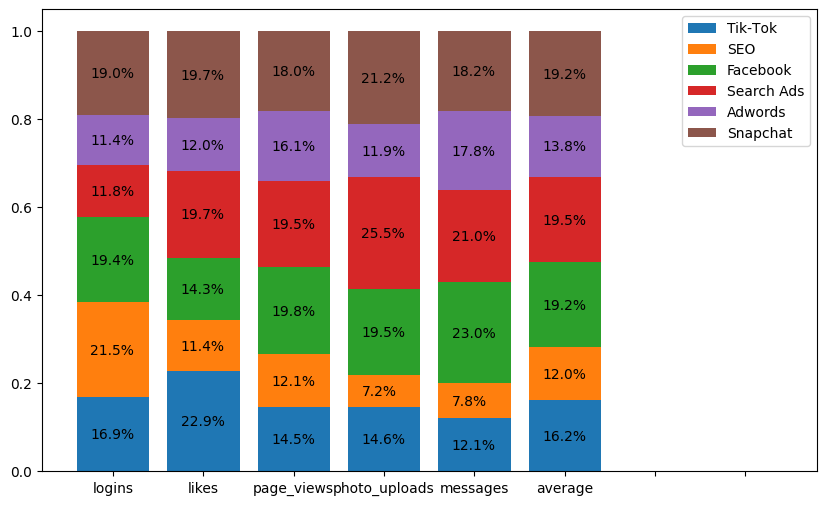

In [20]:
actions_per = actions[actions.columns[1:]].div(actions[actions.columns[1:]].sum(axis=0))
actions_per["network_name"] = actions.network_name
plt.subplots(figsize=(10, 6))
for i, net in enumerate(actions_per.network_name.values):
    data = actions_per.loc[i, actions_per.columns[:-2]]
    bot = actions_per.loc[:(i - 1), actions_per.columns[:-2]].sum(axis=0)
    plt.bar(list(data.index) + ["average"], list(data.values) + [sum(data.values) / 5], width=0.8, bottom=list(bot) + [sum(bot.values) / 5], label=net)
    #plt.bar(, sum(data.values), bottom=))
    for j, act in enumerate(data.index):
        plt.text(j - 0.25, bot.values[j] + data.values[j]/2 - 0.01, str(round(data.values[j] * 100, 1)) + "%")
    plt.text(4.75, sum(bot.values) / 5 + sum(data.values) / 10 - 0.01, str(round(sum(data.values) / 5 * 100, 1)) + "%")
plt.bar(["", " "], [0, 0])
plt.legend()

In [21]:
#economic of users
network_info_total = costs.groupby("source_id").sum()
network_info_total.index = sources.network_name
network_info_total["acquired"] = user_count
network_info_total = network_info_total[network_info_total.columns[[1, 0]]]
network_info_total["payment_revenue"] = payment_revenue.merge(regisrations[["user_id", "source_id"]], how="inner", on="user_id").groupby("source_id").sum().payment_revenue.values
network_info_total["ads_revenue"] = ads_revenue.merge(regisrations[["user_id", "source_id"]], how="inner", on="user_id").groupby("source_id").sum().ads_revenue.values
#network_info_total[network_info_total.columns[1:]] = network_info_total[network_info_total.columns[1:]].div(network_info_total.acquired.values, axis = 0)
network_info_total["revenue"] = network_info_total.payment_revenue + network_info_total.ads_revenue
network_info_total

<ipython-input-21-676ff6bc7851>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  network_info_total = costs.groupby("source_id").sum()
<ipython-input-21-676ff6bc7851>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  network_info_total["payment_revenue"] = payment_revenue.merge(regisrations[["user_id", "source_id"]], how="inner", on="user_id").groupby("source_id").sum().payment_revenue.values
<ipython-input-21-676ff6bc7851>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select onl

,acquired,cost,payment_revenue,ads_revenue,revenue
network_name,,,,,
Tik-Тok,1634,1340.64000,746.24913,235.5553,981.80443
SEO,1097,770.18400,451.34100,136.0834,587.42440
Facebook,22302,20628.52800,18433.31061,4488.8707,22922.18131
Search Ads,1231,2423.24784,644.72408,244.7377,889.46178
Adwords,950,226.35840,300.38184,145.9951,446.37694
Snapchat,2982,1844.52000,1348.28254,538.7144,1886.99694


In [22]:
network_info = network_info_total.div(network_info_total.acquired.values, axis = 0)
network_info

,acquired,cost,payment_revenue,ads_revenue,revenue
network_name,,,,,
Tik-Тok,1.0,0.820465,0.456701,0.144159,0.600860
SEO,1.0,0.702082,0.411432,0.124051,0.535483
Facebook,1.0,0.924963,0.826532,0.201277,1.027808
Search Ads,1.0,1.968520,0.523740,0.198812,0.722552
Adwords,1.0,0.238272,0.316191,0.153679,0.469870
Snapchat,1.0,0.618551,0.452140,0.180655,0.632796


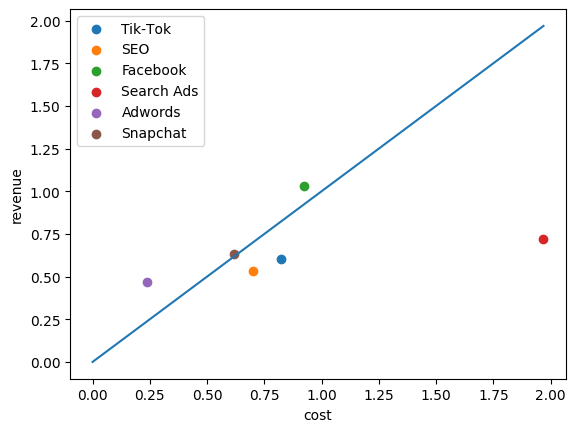

In [23]:
for net in network_info.index:
    plt.scatter(network_info.cost[net], network_info.revenue[net], label=net)
plt.plot([0, max(network_info.cost.max(), network_info.revenue.max())], [0, max(network_info.cost.max(), network_info.revenue.max())])
plt.xlabel("cost")
plt.ylabel("revenue")
plt.legend()

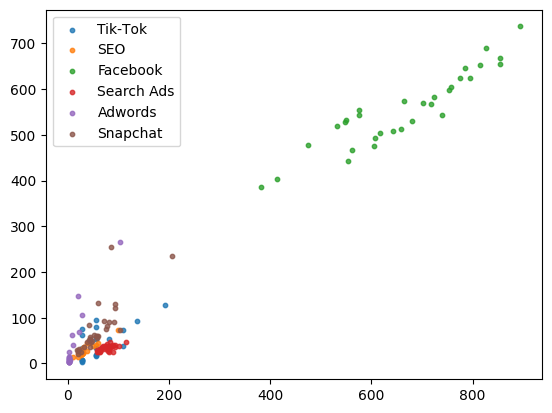

In [24]:
reg_source = regisrations.groupby(by=["registration_date", "source_id"]).count().user_id.to_frame().reset_index().rename(columns={"user_id":"acquired", "registration_date":"date"})
reg_source = costs.merge(reg_source, on=["date", "source_id"], how="inner")
reg_source["network_name"] = reg_source.source_id.map(dict(sources.set_index("source_id").network_name))
for net in reg_source.network_name.unique():
    plt.scatter(reg_source.cost[reg_source.network_name == net], reg_source.acquired[reg_source.network_name == net], label=net, s = 10, alpha=0.8)
plt.legend()
#plt.scatter(reg_source.cost, reg_source.acquired, c=reg_source.source_id)

# New Section

In [25]:
reg_source.to_csv("registrations_by_cost.csv")

In [26]:
reg_source

,date,source_id,cost,acquired,network_name
0,2021-03-01,1,82.0800,54,Tik-Тok
1,2021-03-01,2,38.3040,44,SEO
2,2021-03-01,3,738.7200,543,Facebook
3,2021-03-01,4,58.3680,30,Search Ads
4,2021-03-01,5,103.8768,266,Adwords
...,...,...,...,...,...
153,2021-03-31,1,109.4400,73,Tik-Тok
154,2021-03-31,3,679.4400,531,Facebook
155,2021-03-31,4,65.6640,34,Search Ads
156,2021-03-31,5,3.1008,9,Adwords


<ipython-input-27-a791d650517d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  money = reg_source.groupby("date").sum().cost.to_frame()


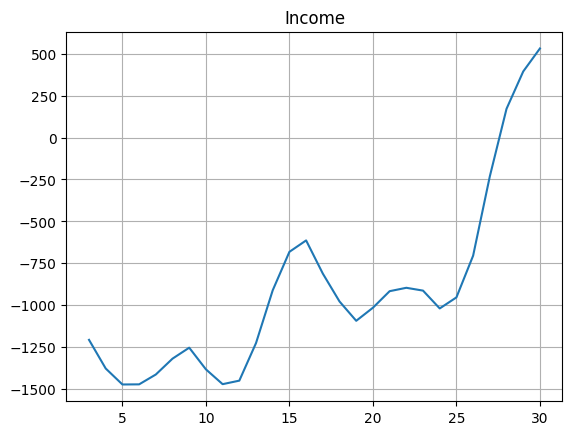

In [27]:
money = reg_source.groupby("date").sum().cost.to_frame()
money["cost_total"] = money.cost.cumsum()#.to_frame()
money["revenue"] = ads_revenue.groupby("date").sum().ads_revenue + payment_revenue.groupby("date").sum().payment_revenue
money["revenue_total"] = money.revenue.cumsum()
money.reset_index(inplace=True)
#plt.plot(range(31), money.cost, label="cost")
#plt.plot(range(31), money.revenue, label="revenue")
plt.plot(range(31), (money.revenue_total - money.cost_total).rolling(4).mean())
plt.title("Income")
plt.grid()
#plt.legend()

In [28]:
money.revenue_total.values[-1] - money.cost_total.values[-1]

480.7675599999893

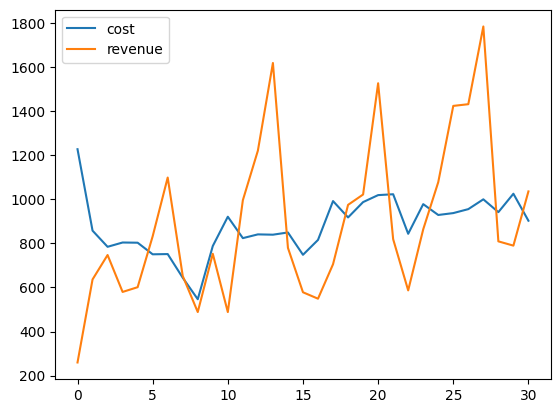

In [29]:
plt.plot(range(31), money.cost, label="cost")
plt.plot(range(31), money.revenue, label="revenue")
plt.legend()